# Detecting Entanglement

In this notebook we will demonstrate how ZX calculus can be used to simplify circuits and make the their entanglement structure explicit.

In [1]:
#Importing the required packages
import sys; sys.path.insert(0, '..')
import random
import pyzx as zx
from fractions import Fraction
from ipywidgets import widgets
from IPython.display import display, Markdown
from pyzx.simplify import clifford_iter

In [2]:
detecting_entanglement = zx.Graph()

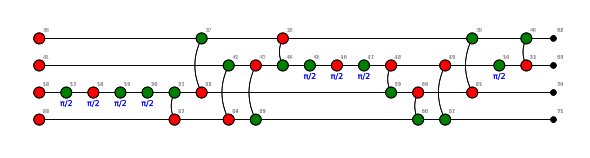

In [6]:

d_a = detecting_entanglement.add_vertex(2, 0, 1, Fraction(0))
d_b = detecting_entanglement.add_vertex(1, 0, 7, Fraction(0))
d_c = detecting_entanglement.add_vertex(2, 0, 10, Fraction(0))
d_d = detecting_entanglement.add_vertex(1, 0, 17, Fraction(0))
d_e = detecting_entanglement.add_vertex(1, 0, 19, Fraction(0))

#Qubit 2
d_f = detecting_entanglement.add_vertex(2, 1, 1, Fraction(0))
d_g = detecting_entanglement.add_vertex(1, 1, 8, Fraction(0))
d_h = detecting_entanglement.add_vertex(2, 1, 9, Fraction(0))
d_i = detecting_entanglement.add_vertex(1, 1, 10, Fraction(0))
d_j = detecting_entanglement.add_vertex(1, 1, 11, Fraction(1/2))
d_k = detecting_entanglement.add_vertex(2, 1, 12, Fraction(1/2))
d_l = detecting_entanglement.add_vertex(1, 1, 13, Fraction(1/2))
d_m = detecting_entanglement.add_vertex(2, 1, 14)
d_n = detecting_entanglement.add_vertex(2, 1, 16)
d_o = detecting_entanglement.add_vertex(1, 1, 18, Fraction(1/2))
d_p = detecting_entanglement.add_vertex(2, 1, 19)

#Qubit 3
d_q = detecting_entanglement.add_vertex(2, 2, 1, Fraction(0))
d_r = detecting_entanglement.add_vertex(1, 2, 2, Fraction(1/2))
d_s = detecting_entanglement.add_vertex(2, 2, 3, Fraction(1/2))
d_t = detecting_entanglement.add_vertex(1, 2, 4, Fraction(1/2))
d_u = detecting_entanglement.add_vertex(1, 2, 5, Fraction(1/2))
d_v = detecting_entanglement.add_vertex(1, 2, 6)
d_w = detecting_entanglement.add_vertex(2, 2, 7)
d_x = detecting_entanglement.add_vertex(1, 2, 14)
d_y = detecting_entanglement.add_vertex(2, 2, 15)
d_z = detecting_entanglement.add_vertex(2, 2, 17)

#Qubit 4
d_alpha = detecting_entanglement.add_vertex(2, 3, 1)
d_beta = detecting_entanglement.add_vertex(2, 3, 6)
d_gamma = detecting_entanglement.add_vertex(2, 3, 8)
d_theta = detecting_entanglement.add_vertex(1, 3, 9)
d_tau = detecting_entanglement.add_vertex(1, 3, 15)
d_upsilon = detecting_entanglement.add_vertex(1, 3, 16)

#Outputs
d_o_1 = detecting_entanglement.add_vertex(0, 0, 20)
d_o_2 = detecting_entanglement.add_vertex(0, 1, 20)
d_o_3 = detecting_entanglement.add_vertex(0, 2, 20)
d_o_4 = detecting_entanglement.add_vertex(0, 3, 20)

detecting_entanglement.add_edges([(d_a,d_b), (d_b, d_c), (d_c, d_d), (d_d,d_e), (d_q, d_r), (d_r, d_s), (d_s, d_t), (d_t, d_u), (d_u,d_v), (d_v,d_w),(d_b,d_w), (d_f, d_g), (d_g, d_h), (d_h, d_i), (d_i, d_c), (d_i, d_j), (d_j, d_k), (d_k, d_l),(d_l, d_m), (d_m, d_n), (d_m, d_x),(d_m, d_n), (d_w, d_x), (d_z,d_d), (d_x, d_y), (d_y, d_z), (d_n, d_o), (d_o, d_p), (d_p, d_e), (d_beta, d_v), (d_gamma,d_g), (d_theta,d_h), (d_tau, d_y), (d_upsilon, d_n), (d_alpha, d_beta), (d_beta, d_gamma), (d_gamma,d_theta), (d_theta, d_tau),(d_tau, d_upsilon)])

detecting_entanglement.add_edges([(d_e, d_o_1), (d_p, d_o_2), (d_z, d_o_3), (d_upsilon, d_o_4)])


zx.draw_matplotlib(detecting_entanglement, labels=True)

spider_simp: 6. 2. 2.  3 iterations
pivot_simp: 3. 1. 1. 1. 1.  5 iterations
lcomp_simp: 4. 2. 1.  3 iterations
pivot_boundary_simp: 1.  1 iterations
lcomp_simp: 1. 1.  2 iterations
id_simp: 2.  1 iterations


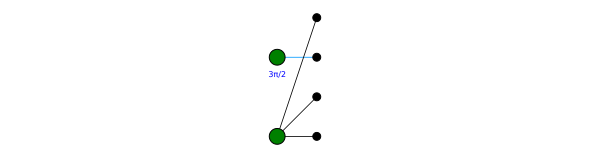

In [4]:
graph_2 = detecting_entanglement.copy()
zx.full_reduce(graph_2, quiet=False) # simplifies the Graph in-place, and show the rewrite steps taken.
graph_2.normalize() # Makes the graph more suitable for displaying
zx.draw_matplotlib(graph_2) # Display the resulting diagram

In [7]:
graph = detecting_entanglement.copy()
graphs = [zx.draw_matplotlib(graph)]
names = ["start"]
for gs, n in clifford_iter(graph):
    graphs.append(zx.draw_matplotlib(gs))
    names.append(n)
zx.drawing.pack_circuit_nf(gs,'grg')
graphs.append(zx.draw_matplotlib(gs))
names.append("reposition")

def plotter(rewrite):
    display(Markdown("Rewrite step: " + names[rewrite]))
    display(graphs[rewrite])

w = widgets.interactive(plotter, rewrite=(0,len(graphs)-1))
slider = w.children[0]
slider.layout.width = "{!s}px".format(min(800,50*len(graphs)))
output = w.children[-1]
output.layout.height = "{!s}px".format(204*20)
slider.value = 0
w

interactive(children=(IntSlider(value=0, description='rewrite', layout=Layout(width='750px'), max=14), Output(…